In [40]:
# # coding=utf-8

# import numpy as np
# import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif'] = ['Arial']  # 如果要显示中文字体,则在此处设为：SimHei
# plt.rcParams['axes.unicode_minus'] = False  # 显示负号

# x = np.array([1, 2, 3, 4, 5, 6])
# VGG_supervised = np.array([2.9749694, 3.9357018, 4.7440844, 6.482254, 8.720203, 13.687582])
# VGG_unsupervised = np.array([2.1044724, 2.9757383, 3.7754183, 5.686206, 8.367847, 14.144531])
# ourNetwork = np.array([2.0205495, 2.6509762, 3.1876223, 4.380781, 6.004548, 9.9298])

# # label在图示(legend)中显示。若为数学公式,则最好在字符串前后添加"$"符号
# # color：b:blue、g:green、r:red、c:cyan、m:magenta、y:yellow、k:black、w:white、、、
# # 线型：-  --   -.  :    ,
# # marker：.  ,   o   v    <    *    +    1
# plt.figure(figsize=(10, 5))
# plt.grid(linestyle="--")  # 设置背景网格线为虚线
# ax = plt.gca()
# ax.spines['top'].set_visible(False)  # 去掉上边框
# ax.spines['right'].set_visible(False)  # 去掉右边框


# plt.plot(x, VGG_supervised, marker='o', color="blue", label="VGG-style Supervised Network", linewidth=1.5)
# plt.plot(x, VGG_unsupervised, marker='o', color="green", label="VGG-style Unsupervised Network", linewidth=1.5)
# plt.plot(x, ourNetwork, marker='o', color="red", label="ShuffleNet-style Network", linewidth=1.5)

# group_labels = ['Top 0-5%', 'Top 5-10%', 'Top 10-20%', 'Top 20-50%', 'Top 50-70%', ' Top 70-100%']  # x轴刻度的标识
# plt.xticks(x, group_labels, fontsize=12, fontweight='bold')  # 默认字体大小为10
# plt.yticks(fontsize=12, fontweight='bold')
# # plt.title("example", fontsize=12, fontweight='bold')  # 默认字体大小为12
# plt.xlabel("Performance Percentile", fontsize=13, fontweight='bold')
# plt.ylabel("4pt-Homography RMSE", fontsize=13, fontweight='bold')
# plt.xlim(0.9, 6.1)  # 设置x轴的范围
# plt.ylim(1.5, 16)

# # plt.legend()          #显示各曲线的图例
# plt.legend(loc=0, numpoints=1)
# leg = plt.gca().get_legend()
# ltext = leg.get_texts()
# plt.setp(ltext, fontsize=12, fontweight='bold')  # 设置图例字体的大小和粗细

# plt.savefig('./filename.svg', format='svg')  # 建议保存为svg格式,再用inkscape转为矢量图emf后插入word中
##https://cloudconvert.com/svg-to-emf
# plt.show()

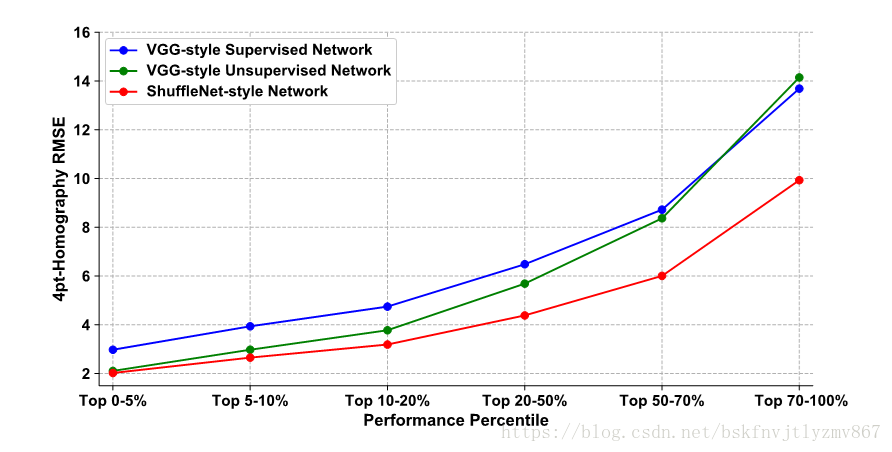

# 论文画图

In [1]:
#encoding=utf-8
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras.layers import *
from keras.utils import plot_model
import scipy.signal as signal
import numpy as np

from extract_csi import extract_csi, get_scaled_csi

import matplotlib.pyplot as plt
from tqdm import tqdm
from pyts.image import *

import re
import seaborn as sns
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False
# config = {
#     "font.family":'serif',
#     "font.size": 20,
#     "mathtext.fontset":'stix',
#     "font.serif": ['SimSun'],
# }
# plt.rcParams.update(config)

plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False

sns.set_context("paper")
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

In [3]:
*[1,2,3,4,5,6]

SyntaxError: can't use starred expression here (<ipython-input-3-a05bec85d251>, line 1)

In [4]:
type((2, *tuple([1,2,3,4,5,6])))

tuple

In [38]:
# 画出一个文件的图像
def plot_csi(csi_data, save_name):
    fig, ax = plt.subplots(1, 3, figsize=(10, 4))
    ax[0].plot(csi_data[:, 0], color='k')
    ax[0].set_xlabel('数据包', fontsize=20)
    ax[0].set_ylabel('$\mathrm{CSI}$幅值/dB', fontsize=20)
    ax[0].set_title('$\mathrm{(a)}$原始$\mathrm{CSI}$幅值', fontsize=20, y=-0.5)
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['top'].set_visible(False)
    ax[0].set_xlim((0, 250))
    ax[0].set_ylim((0, 50))
    ax[0].set_xticks([0,50,100,150,200,250])
    ax[0].set_yticks([0,10,20,30,40,50])#
    ax[1].plot(csi_data[:, 1], color='k')#, label='A相线损', linestyle = '-')
    ax[1].set_xlabel('数据包', fontsize=20)
    ax[1].set_ylabel('$\mathrm{CSI}$幅值/dB', fontsize=20)
    ax[1].set_title('$\mathrm{(b)}$低通滤波后$\mathrm{CSI}$的幅值', fontsize=20, y=-0.5)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['top'].set_visible(False)
    ax[1].set_xlim((0, 250))
    ax[1].set_ylim((0, 50))
    ax[1].set_xticks([0,50,100,150,200,250])
    ax[1].set_yticks([0,10,20,30,40,50])#
    ax[2].plot(csi_data[:, 2], color='k')#, label='A相线损', linestyle = '-')
    ax[2].set_xlabel('数据包', fontsize=20)
    ax[2].set_ylabel('$\mathrm{CSI}$幅值/dB', fontsize=20)
    ax[2].set_title('$\mathrm{(b)}$低通滤波后$\mathrm{CSI}$的幅值', fontsize=20, y=-0.5)
    ax[2].spines['right'].set_visible(False)
    ax[2].spines['top'].set_visible(False)
    ax[2].set_xlim((0, 250))
    ax[2].set_ylim((0, 50))
    ax[2].set_xticks([0,50,100,150,200,250])
    ax[2].set_yticks([0,10,20,30,40,50])#

    plt.tight_layout()
    # plt.show()
    # plt.savefig('raw_filt.svg', format='svg', bbox_inches='tight')  # 建议保存为svg格式,再用inkscape转为矢量图emf后插入word中
    plt.savefig(save_name, dpi=300, bbox_inches='tight')

In [39]:
def process_data(file_path_name, save_path):
    if file_path_name.endswith('.dat'):
        data = extract_csi(file_path_name)
        tx, rx, sub = data[0]['csi'].shape
        data_csi = np.zeros((len(data), tx, rx, sub), dtype=np.complex64)
        for i in range(len(data)):
            data_csi[i] = get_scaled_csi(data[i])
#             data_csi = np.clip(np.abs(np.squeeze(data_csi)), 1e-8, 1e100)   # (205, 3, 30)

#             # ---滤波后分别从每对天线对找方差最大的子载波形成N*3，不同的动作使用不同的天线对
#             data_csi_filt = np.zeros((data_csi.shape[0],3))  #N*3
#             for ant in range(3):
#                 data_csi_ant = data_csi[:, ant, :]  #n*30
#                 b, a = signal.butter(5, 4*2/30, 'low')
#                 #b, a = signal.butter(5, [0.2*2/20, 5*2/20], "bandpass")
#                 var_max = 0
#                 s_max = None
#                 for s in range(30):
#                     carrier_data = signal.lfilter(b, a, data_csi_ant[:, s]) # N*1
#                     length = len(carrier_data)
#                     var_temp = np.var(carrier_data[length//5:3*length//5]) 
#                     if var_max < var_temp: 
#                         var_max = var_temp
#                         s_max = carrier_data
#                 data_csi_filt[:, ant] = s_max
        data_csi = np.clip(np.abs(np.squeeze(data_csi)), 1e-8, 1e100).reshape(-1, 3, 30)   # (205, 2, 2, 30)
        # ---滤波后分别从每对天线对找方差最大的子载波形成N*4，不同的动作使用不同的天线对
        data_csi_filt = np.zeros((data_csi.shape[0], 3))  #N*4
        for ant in range(3):
            data_csi_ant = data_csi[:, ant, :]  #n*30
            b, a = signal.butter(5, 4*2/30, 'low')
            #b, a = signal.butter(5, [0.2*2/20, 5*2/20], "bandpass")
            var_max = 0
            s_max = None
            for s in range(30):
                carrier_data = signal.lfilter(b, a, data_csi_ant[:, s]) # N*1
                length = len(carrier_data)
                var_temp = np.var(carrier_data[length//5:3*length//5]) 
                if var_max < var_temp: 
                    var_max = var_temp
                    s_max = carrier_data
            data_csi_filt[:, ant] = s_max

            # plt.savefig('original_six_antenna_pair({}).jpg'.format(file_name.split('\\')[-1].split('.')[-2]), dpi = 300)
#             #scio.savemat(os.path.join(save_path, f.split('.')[0]+'.mat'), {'csi': data_csi_interpolate})
        
        plot_csi(data_csi_filt, os.path.join(save_path, os.path.split(file_path_name)[1].replace('dat', 'jpg')))
        # return data_csi, data_csi_filt

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], 

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], 

Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], 

Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0, flags=flags)
Font 'default' does not have a glyph fo

Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], 

/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a gl

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], 

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], 

Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], 

Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0, flags=flags)
Font 'default' does not have a glyph fo

Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], 

/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a gl

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], 

/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0, flags=flags)
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph fo

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], 

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], 

Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/si

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], 

Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
Font 'default' does not have a gl

Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], 

/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0, flags=flags)
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph fo

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], 

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], 

Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/si

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], 

Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
Font 'default' does not have a gl

Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], 

/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0, flags=flags)
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph fo

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], 

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], 

Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/si

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], 

Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
Font 'default' does not have a gl

Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], 

/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0, flags=flags)
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph fo

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], 

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], 

Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/si

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], 

Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
Font 'default' does not have a gl

Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], 

/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0, flags=flags)
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph fo

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], 

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], 

Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/si

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], 

Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
Font 'default' does not have a gl

Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], 

/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0, flags=flags)
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph fo

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], 

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], 

Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/si

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], 

Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
Font 'default' does not have a gl

Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], 

/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0, flags=flags)
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph fo

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], 

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], 

Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/si

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], 

Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
Font 'default' does not have a gl

Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], 

/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0, flags=flags)
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph fo

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], 

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], 

Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/si

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], 

Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
Font 'default' does not have a gl

Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], 

/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0, flags=flags)
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph fo

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], 

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], 

Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/si

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], 

Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zut_csi/anaconda3/envs/tomding/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
Font 'default' does not have a gl

Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7684' [U+7684], 

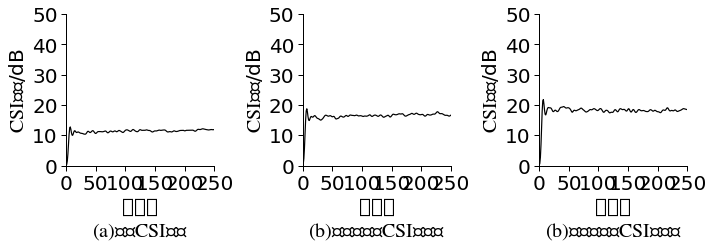

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

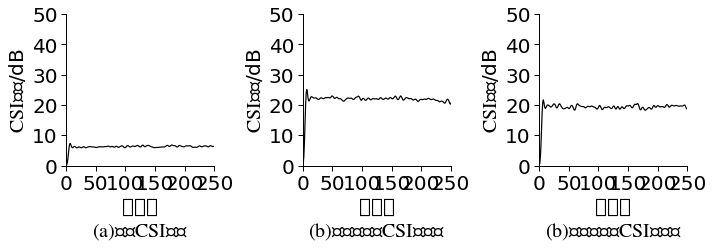

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

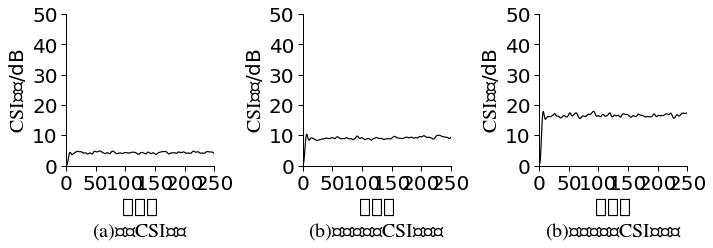

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

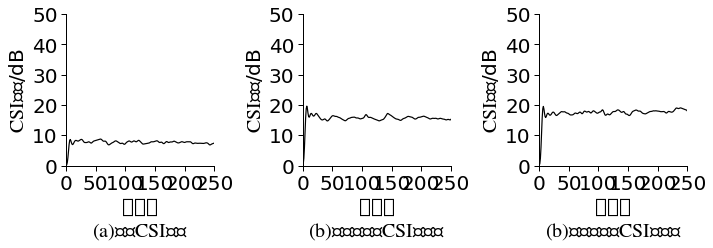

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

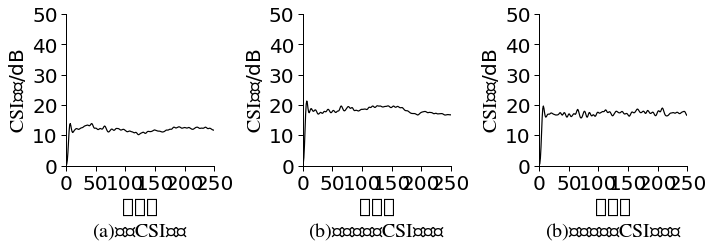

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

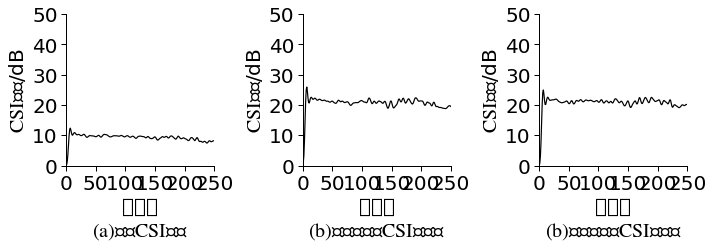

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

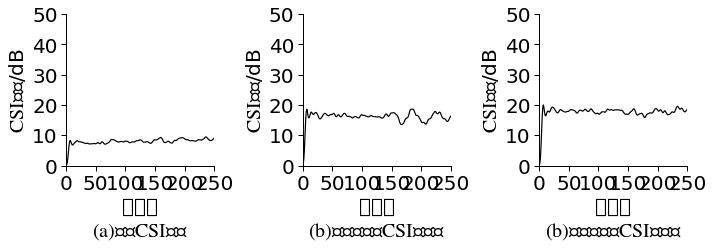

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

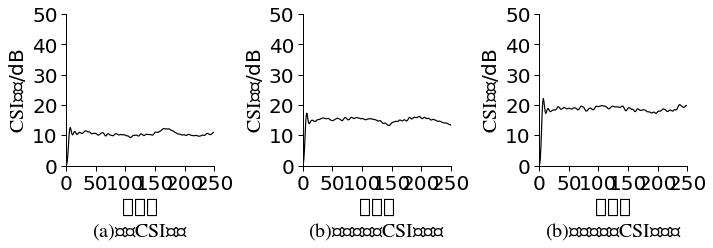

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

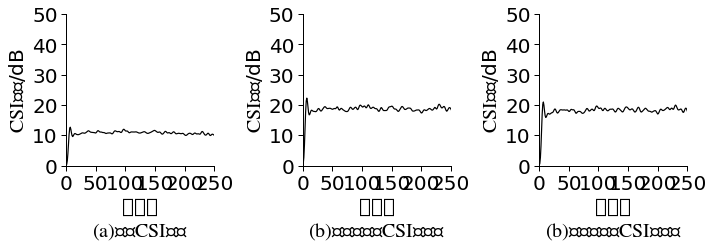

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

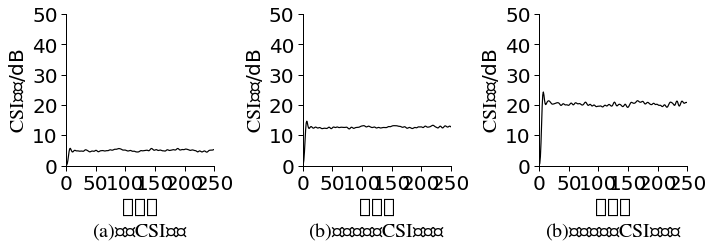

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

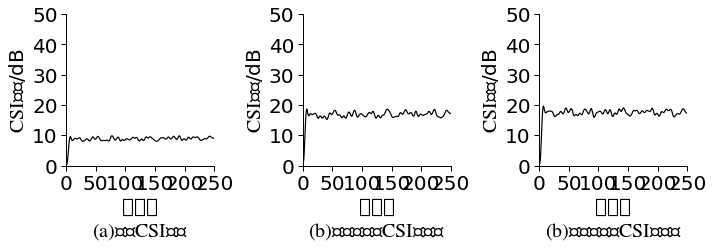

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

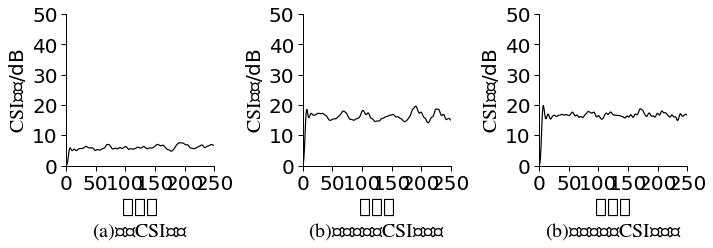

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

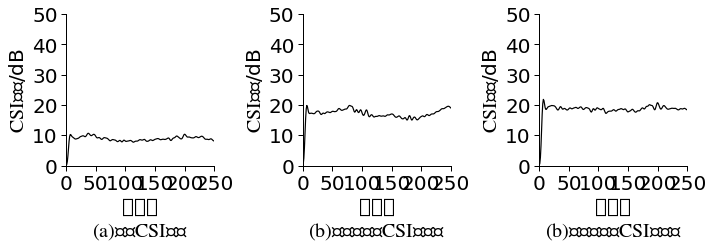

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

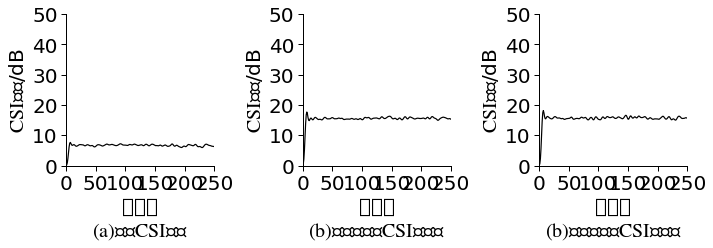

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

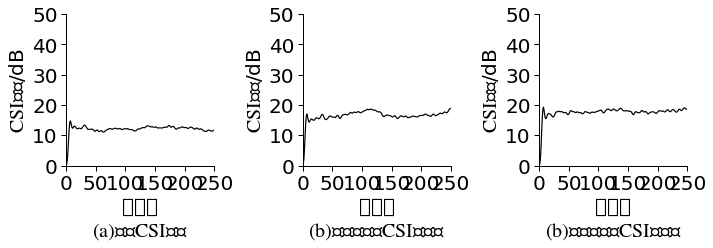

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

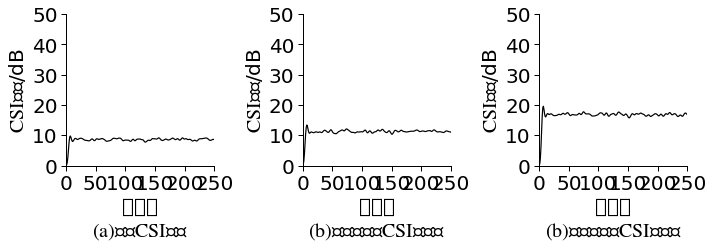

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

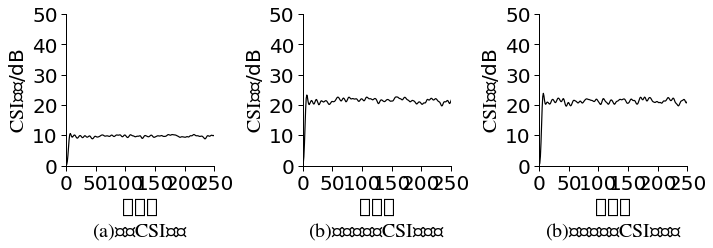

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

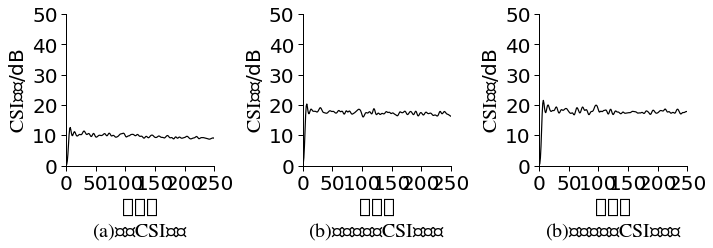

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

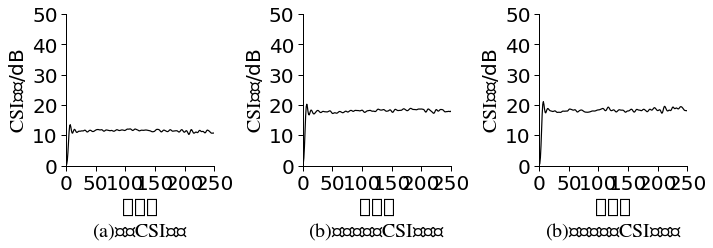

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

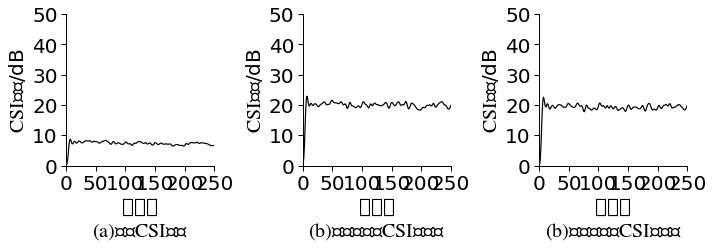

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

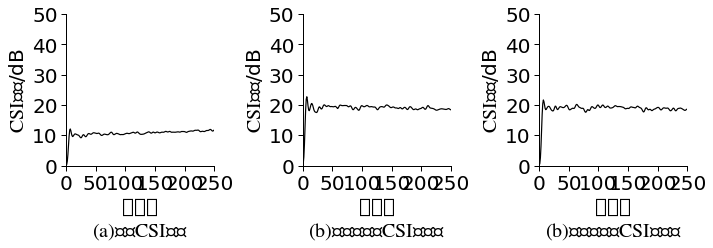

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

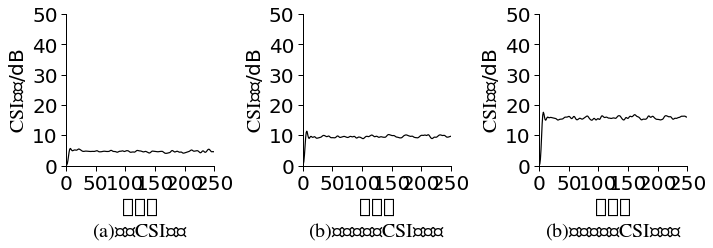

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

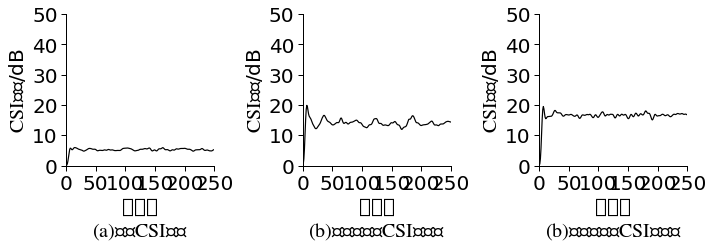

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

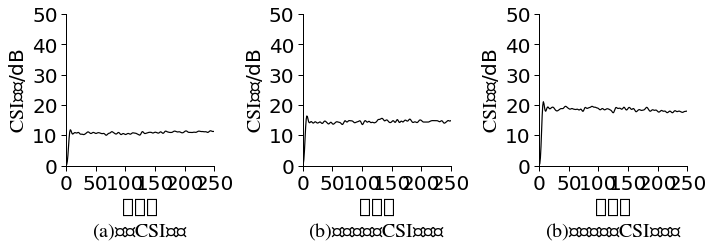

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

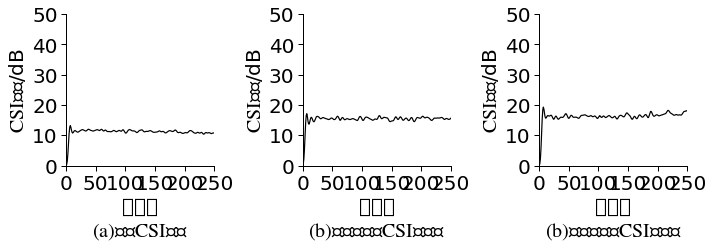

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

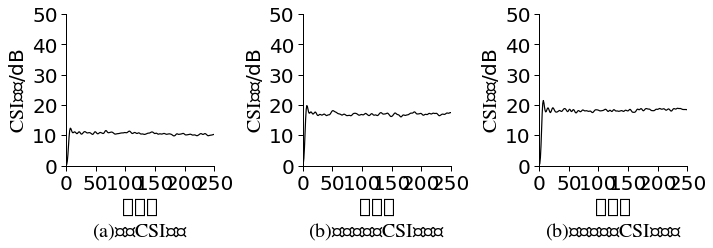

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

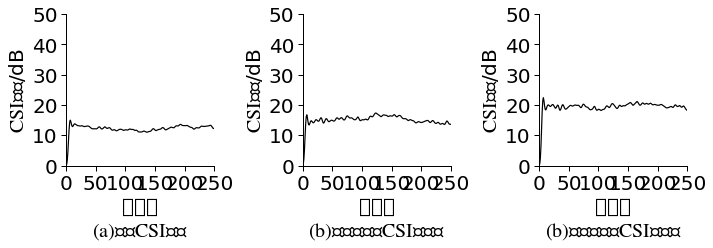

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

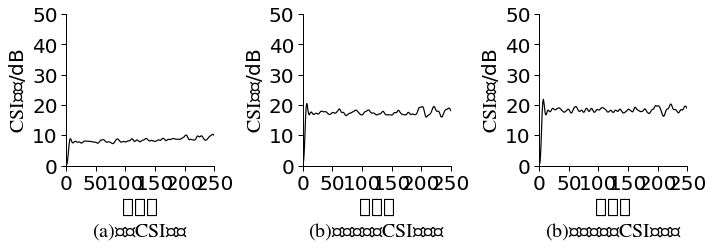

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

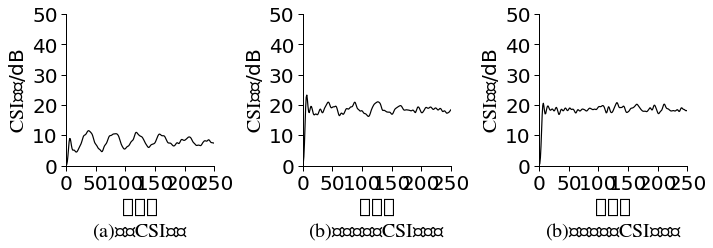

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

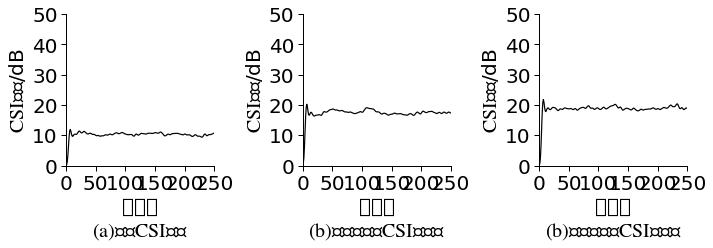

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

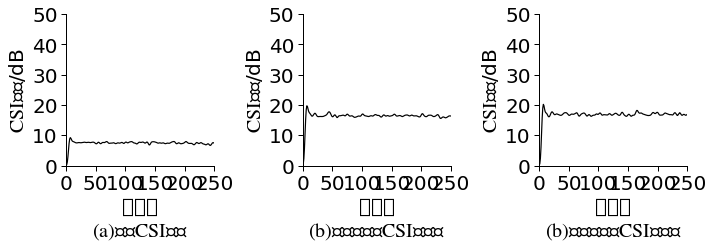

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

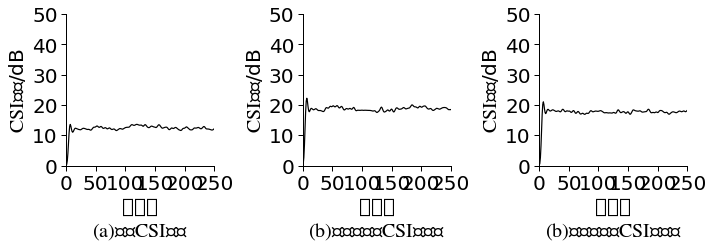

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

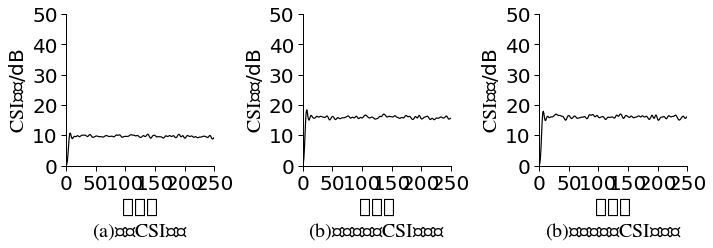

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

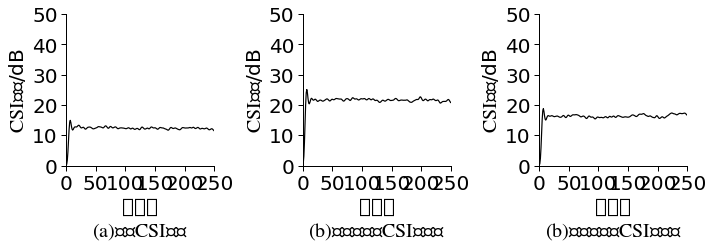

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

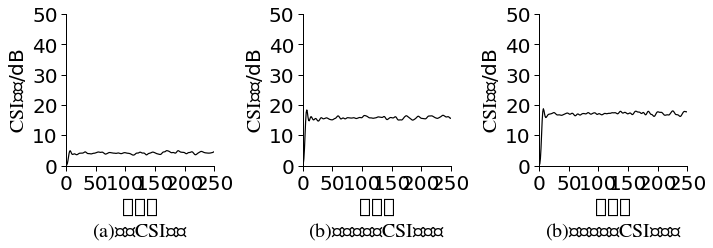

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

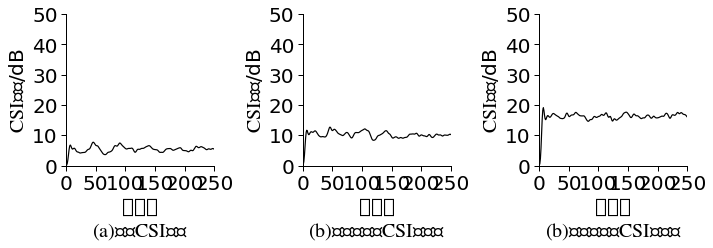

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

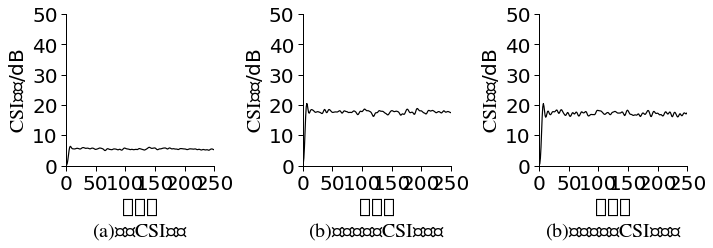

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

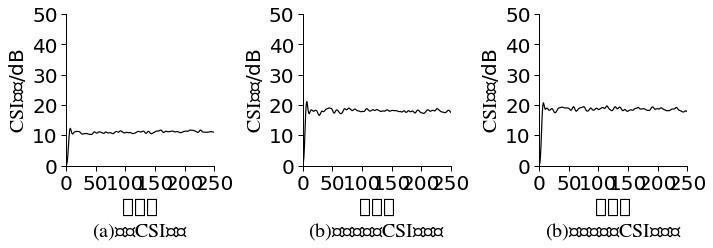

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

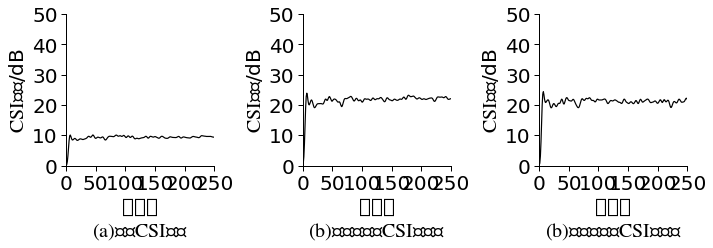

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

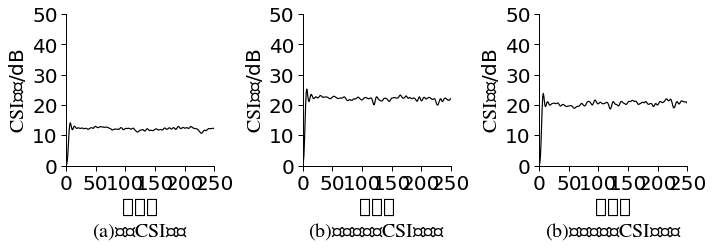

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

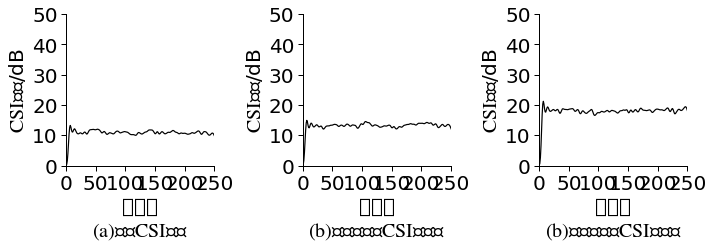

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

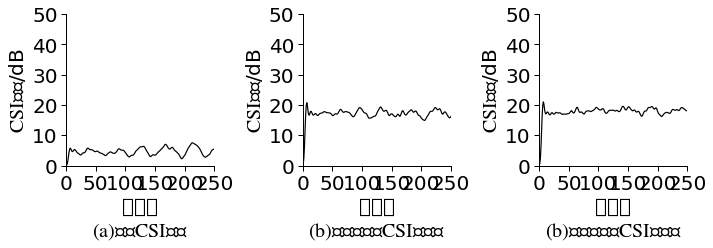

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

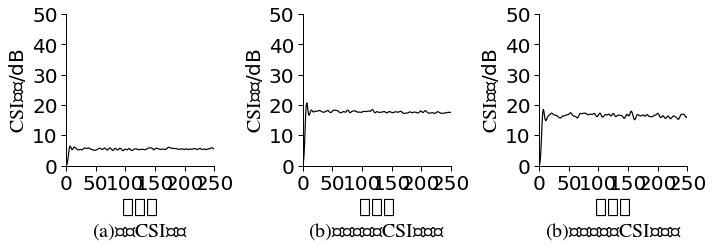

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

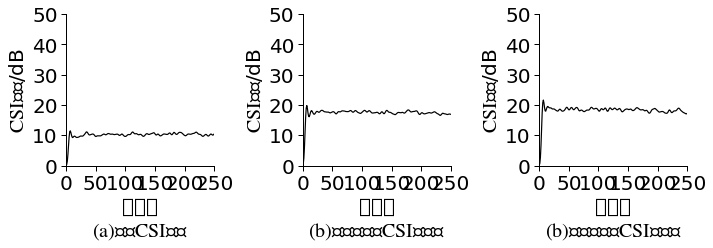

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

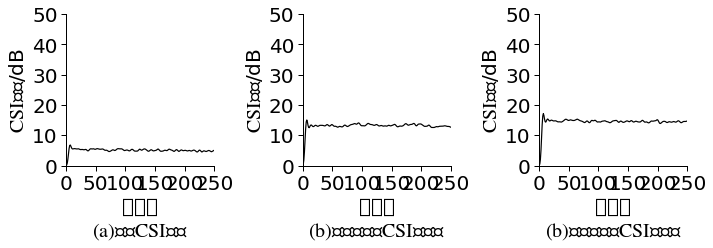

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

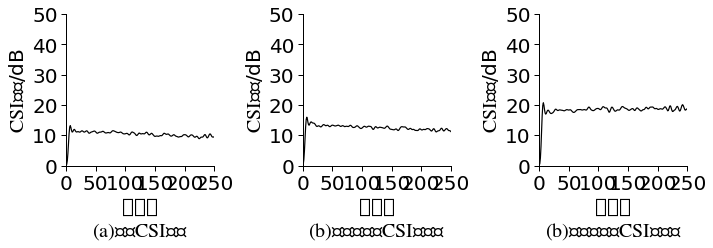

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

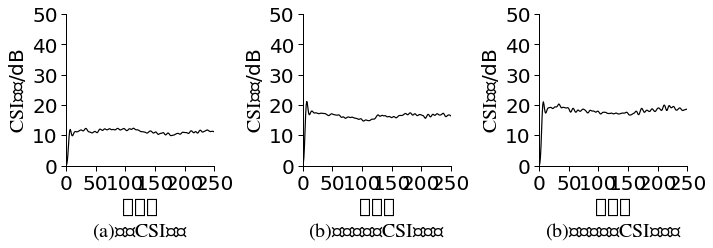

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

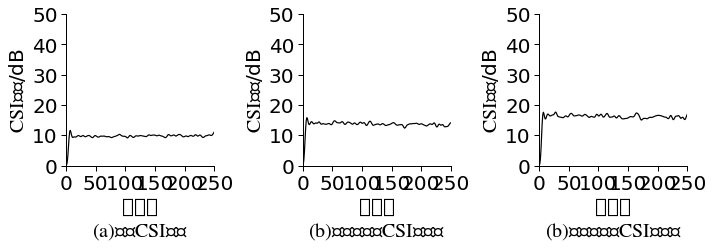

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

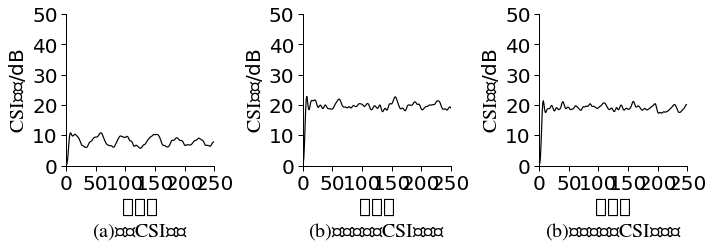

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

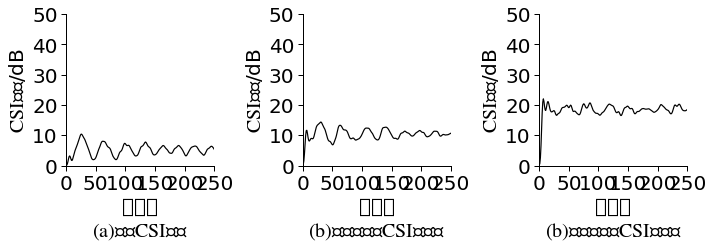

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

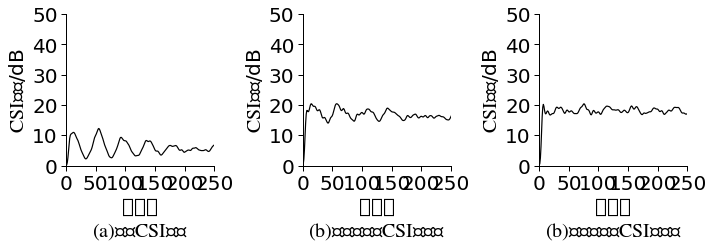

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

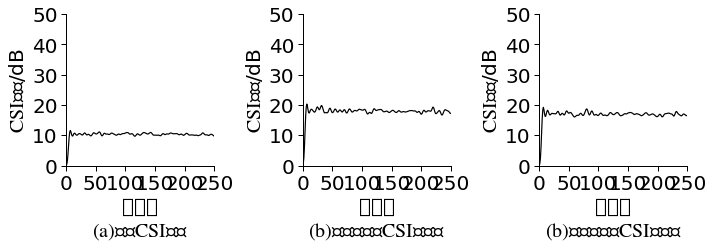

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

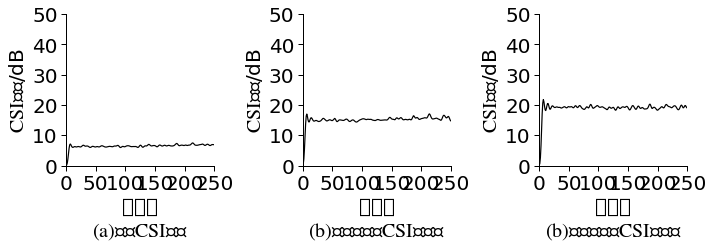

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

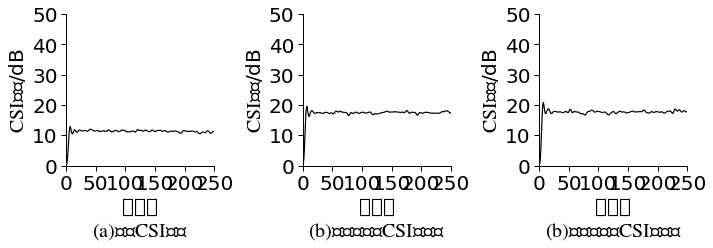

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

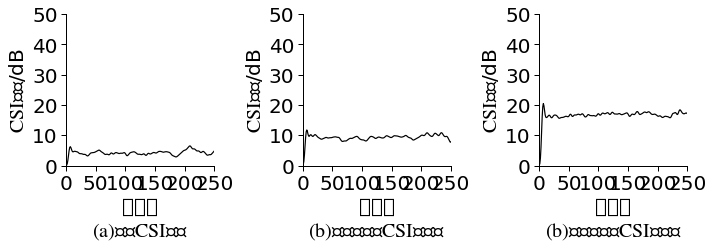

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

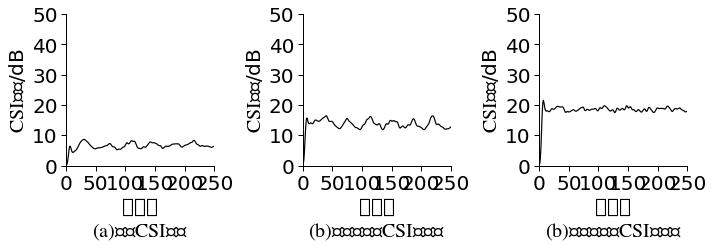

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

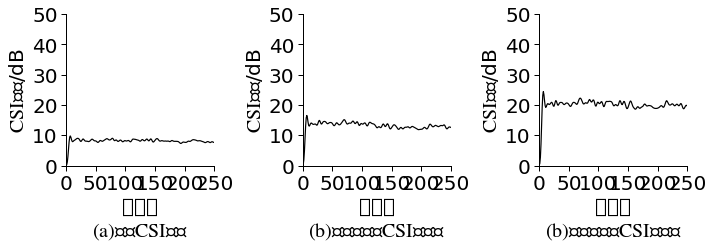

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

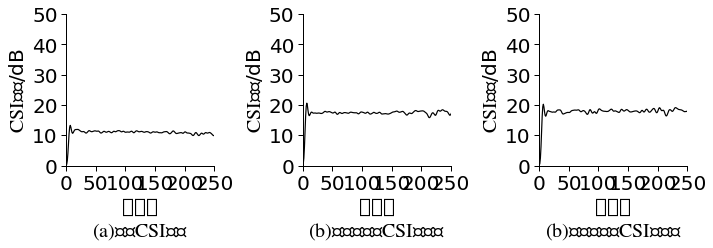

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

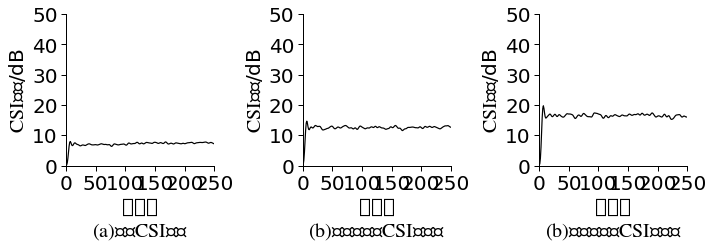

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

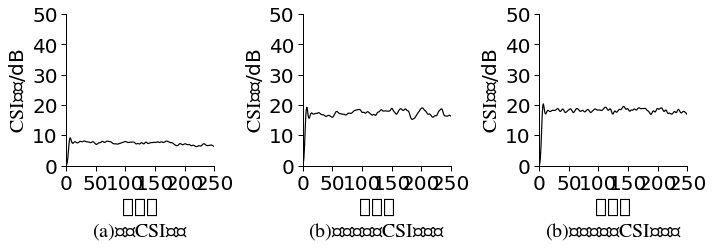

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

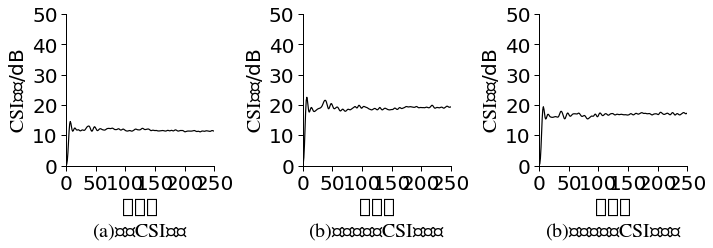

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

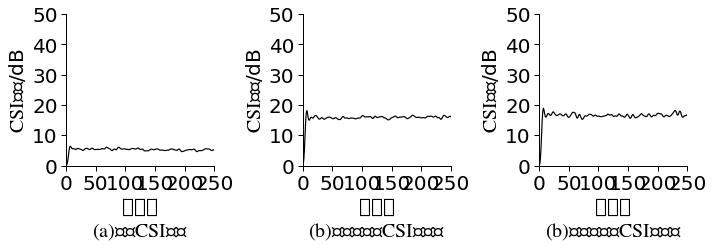

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

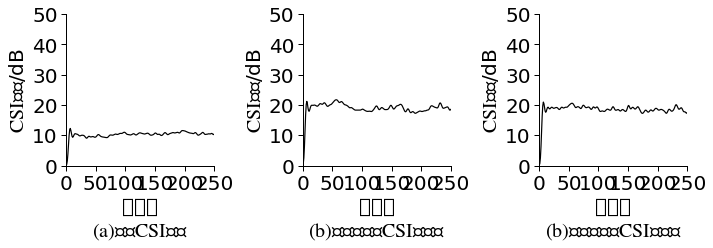

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

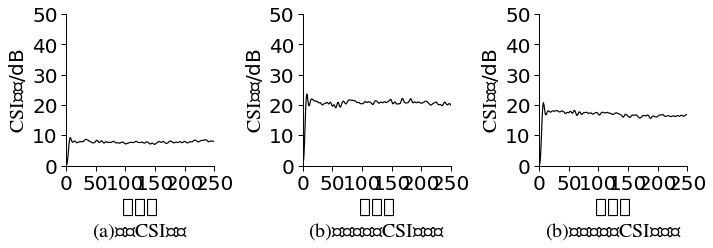

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

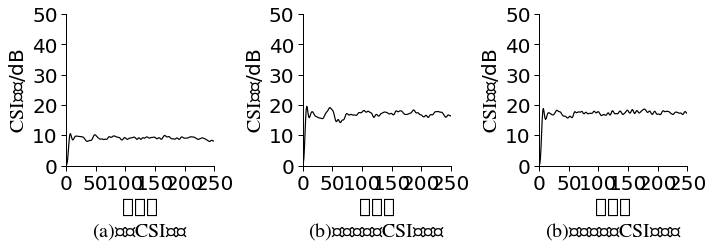

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

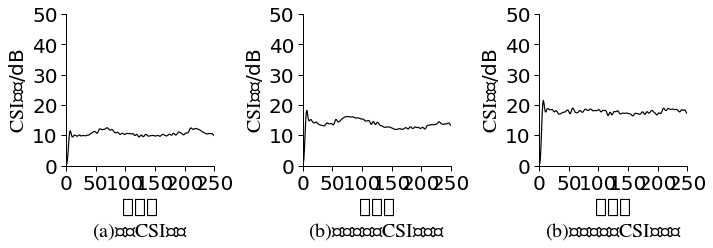

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

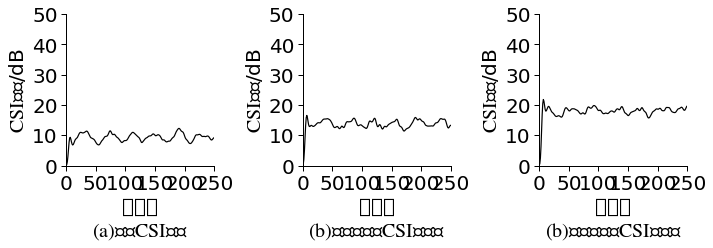

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

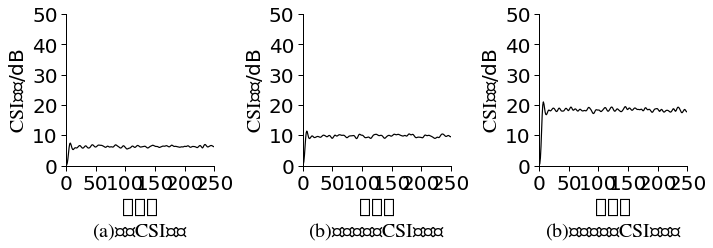

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

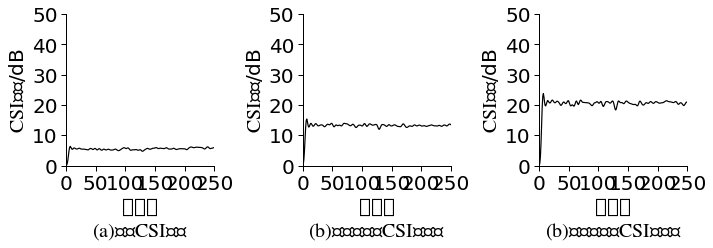

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

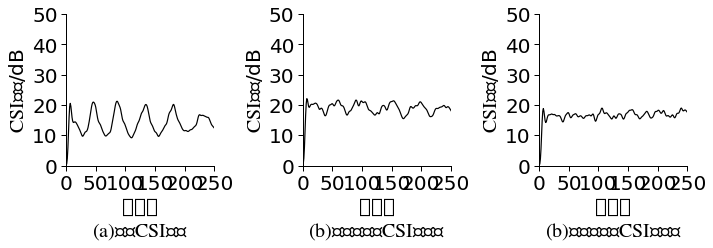

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

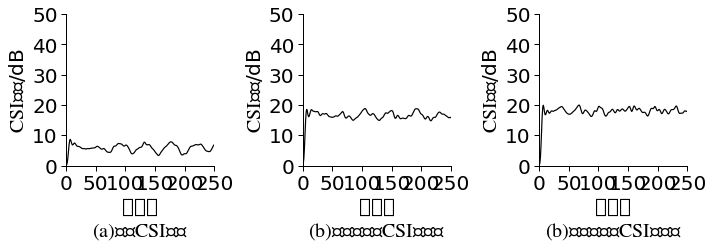

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

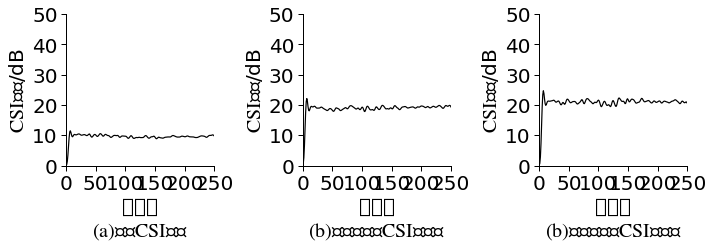

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

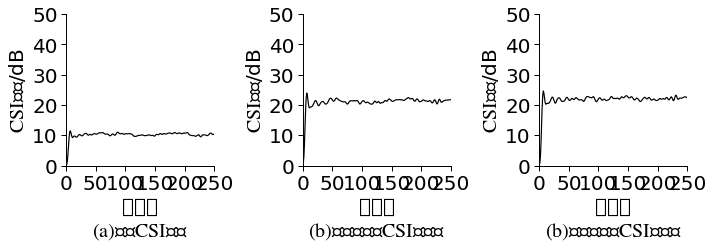

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

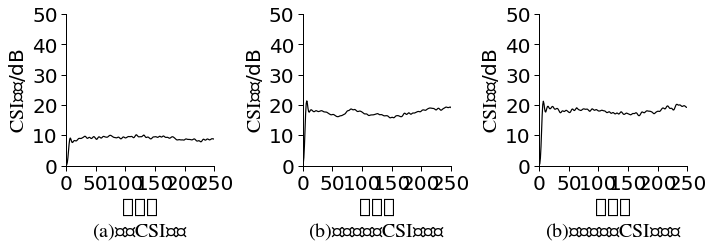

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

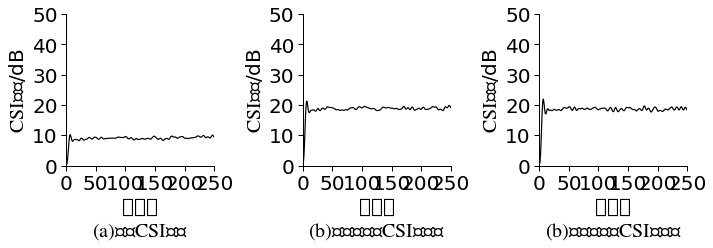

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

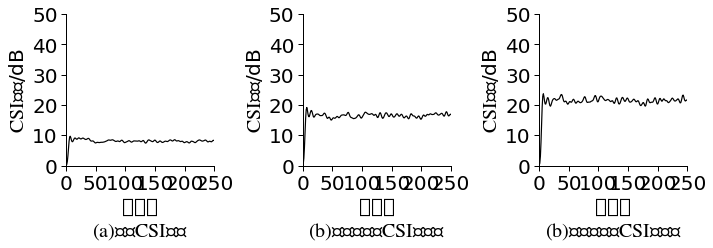

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

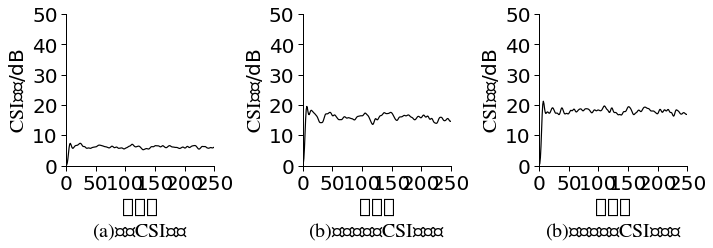

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

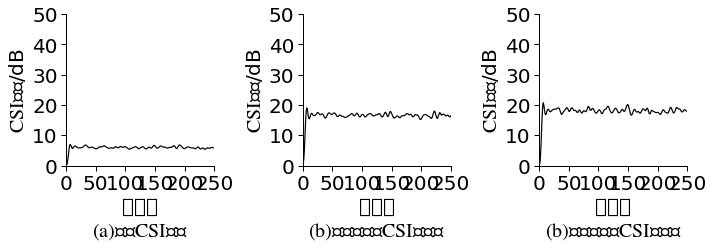

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

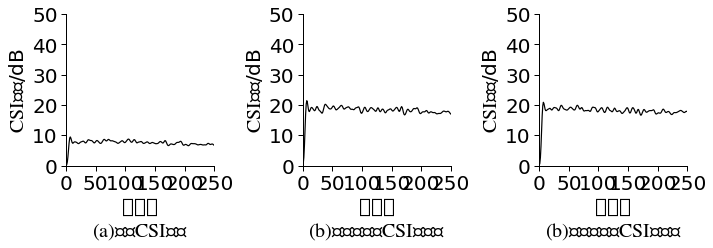

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

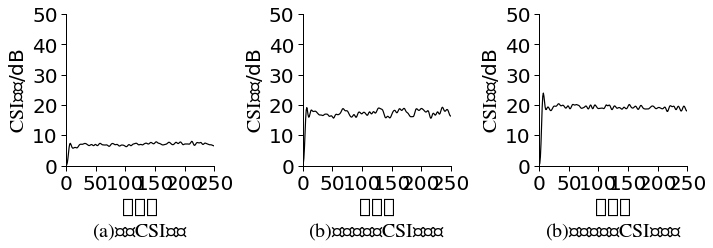

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

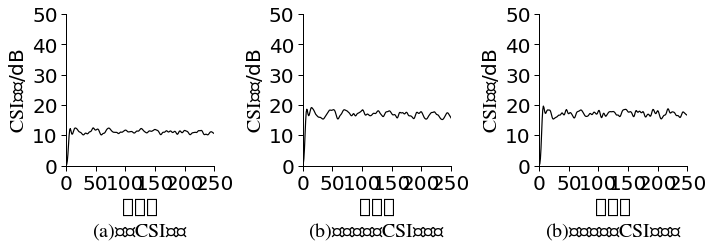

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

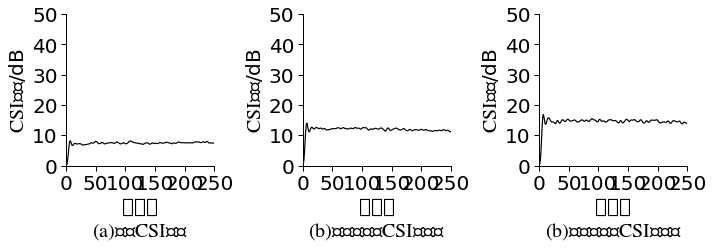

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

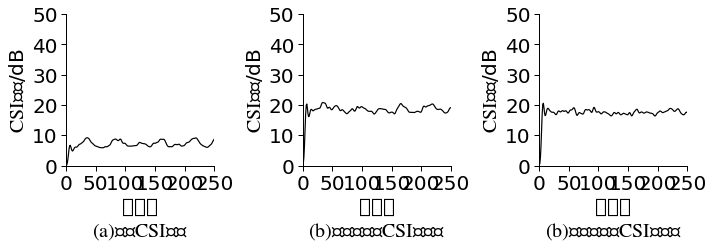

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

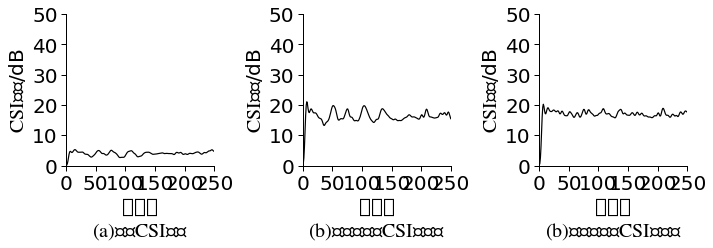

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

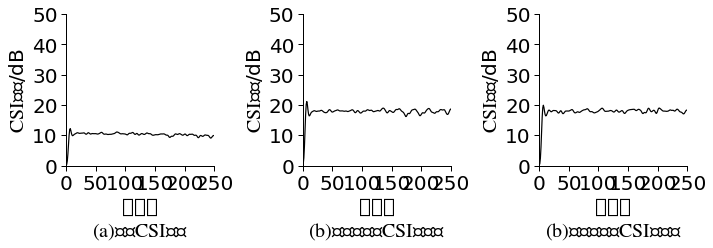

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

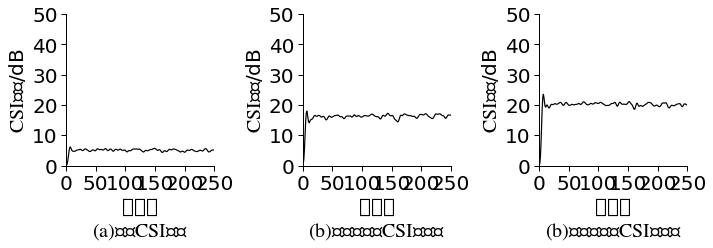

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

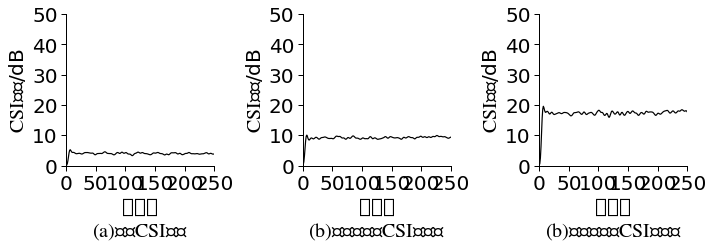

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

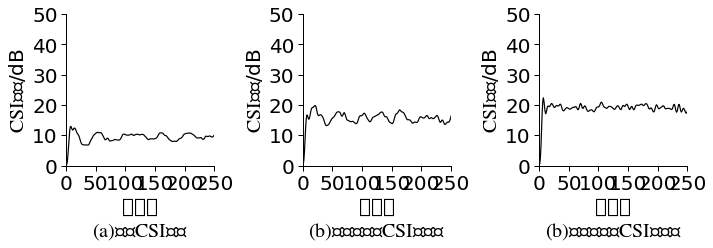

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

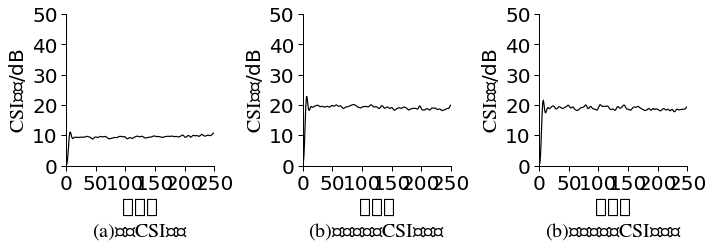

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

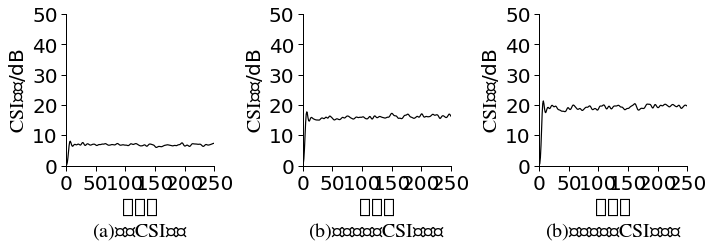

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

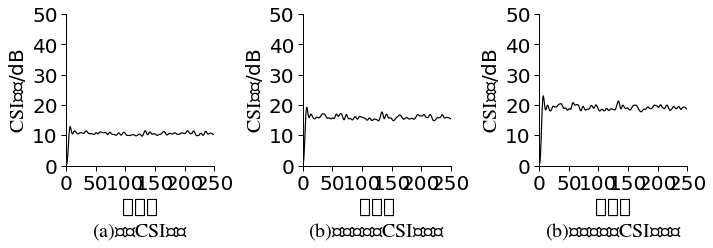

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

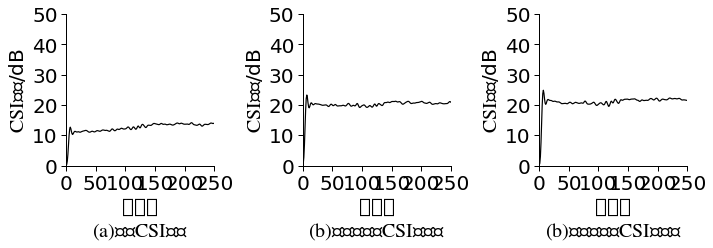

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

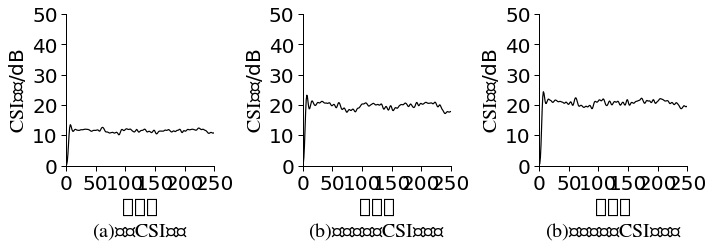

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

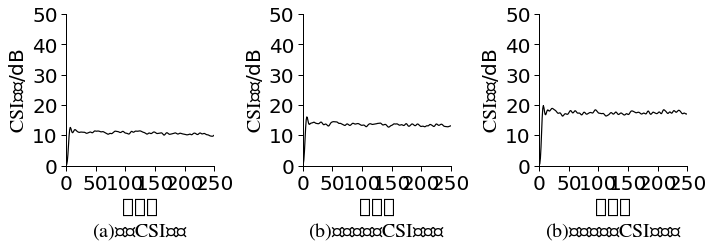

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

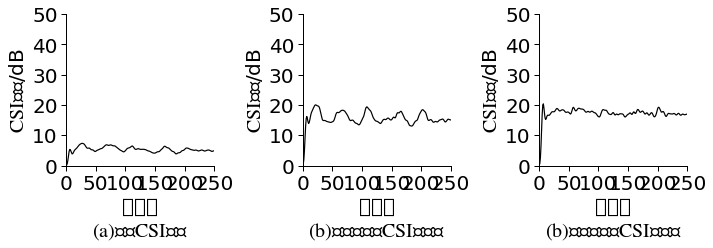

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

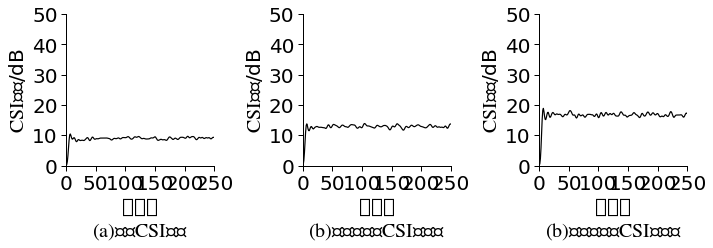

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

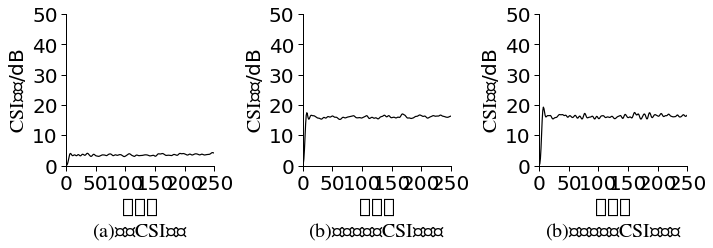

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

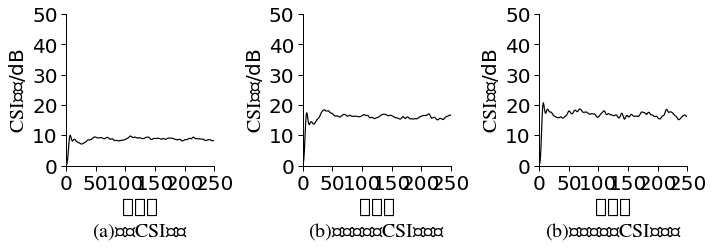

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

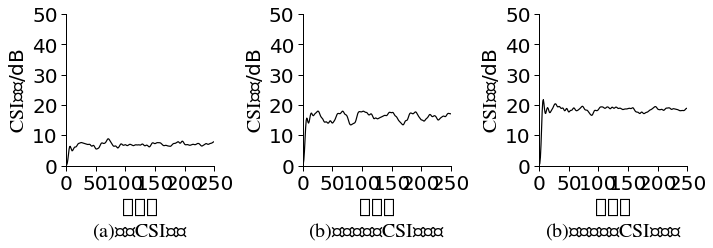

Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u539f' [U+539f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u59cb' [U+59cb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5e45' [U+5e45], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u4f4e' [U+4f4e], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u901a' [U+901a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ee4' [U+6ee4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u540e' [U+540e], 

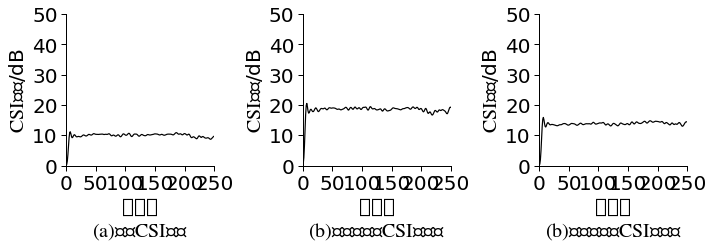

In [42]:
# 画一些数据看一下 
counter = 0 
import os 
# data_path = '/home/zut_csi/tomding/RCNN/data_qinghua/20181112/user2'
# save_path = '/home/zut_csi/tomding/RCNN/trash/'
data_path = '/home/zut_csi/tomding/RCNN/data_gait/room1/1'
save_path = '/home/zut_csi/tomding/RCNN/trash/'
for i in os.listdir(data_path):
    if counter< 100:
        results = re.match(re.compile('user1-.*-.*-.*', re.S), i)  # 选择动作1可视化
        if results != None:
            name = results.group()
            # (n, 205, 4, 30)  # (n, 205, 4)
            process_data(os.path.join(data_path, i), save_path)  
            counter += 1
    else:
        break

In [16]:
path = r'/home/zut_csi/tomding/RCNN/data_qinghua/20181112/user2'
img_save_path = '/home/zut_csi/tomding/RCNN/trash/'
c_raw, c_filt = [], []   
for i in os.listdir(path):
    results = re.match(re.compile('user2-1-.*-.*-*-r.*', re.S), i)  # 选择动作1可视化
    if results != None:
        name = results.group()
        # (n, 205, 4, 30)  # (n, 205, 4)
        raw, filt = process_data(os.path.join(path,i), os.path.join(train_save_path, '1'))  
        c_raw.append(raw)
        c_filt.append(filt)

12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
1223

12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232
12232


# 滤波前后的图像

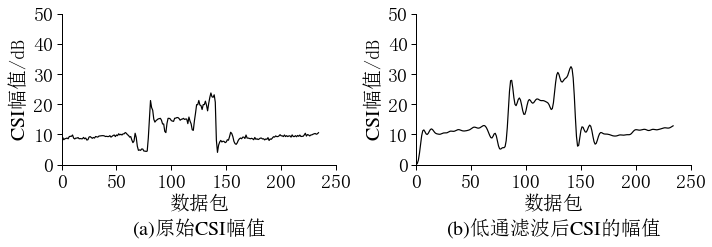

In [13]:
# -------------------画出第一个动作第一个CSI包第二个天线对第一个子载波的原始图像和滤波后图像
def compare_filt()
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax[0].plot(c_raw[0][:, 1, 0], color='k')
    ax[0].set_xlabel('数据包', fontsize=20)
    ax[0].set_ylabel('$\mathrm{CSI}$幅值/dB', fontsize=20)
    ax[0].set_title('$\mathrm{(a)}$原始$\mathrm{CSI}$幅值', fontsize=20, y=-0.5)
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['top'].set_visible(False)
    ax[0].set_xlim((0, 250))
    ax[0].set_ylim((0, 50))
    ax[0].set_xticks([0,50,100,150,200,250])
    ax[0].set_yticks([0,10,20,30,40,50])#


    ax[1].plot(c_filt[0][:, 1], color='k')#, label='A相线损', linestyle = '-')
    ax[1].set_xlabel('数据包', fontsize=20)
    ax[1].set_ylabel('$\mathrm{CSI}$幅值/dB', fontsize=20)
    ax[1].set_title('$\mathrm{(b)}$低通滤波后$\mathrm{CSI}$的幅值', fontsize=20, y=-0.5)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['top'].set_visible(False)
    ax[1].set_xlim((0, 250))
    ax[1].set_ylim((0, 50))
    ax[1].set_xticks([0,50,100,150,200,250])
    ax[1].set_yticks([0,10,20,30,40,50])#

    plt.tight_layout()
    plt.savefig('raw_filt.svg', format='svg', bbox_inches='tight')  # 建议保存为svg格式,再用inkscape转为矢量图emf后插入word中

    #plt.savefig('raw_filt.jpg', dpi=300, bbox_inches='tight')

# 数据增强

(235,) 32142142134


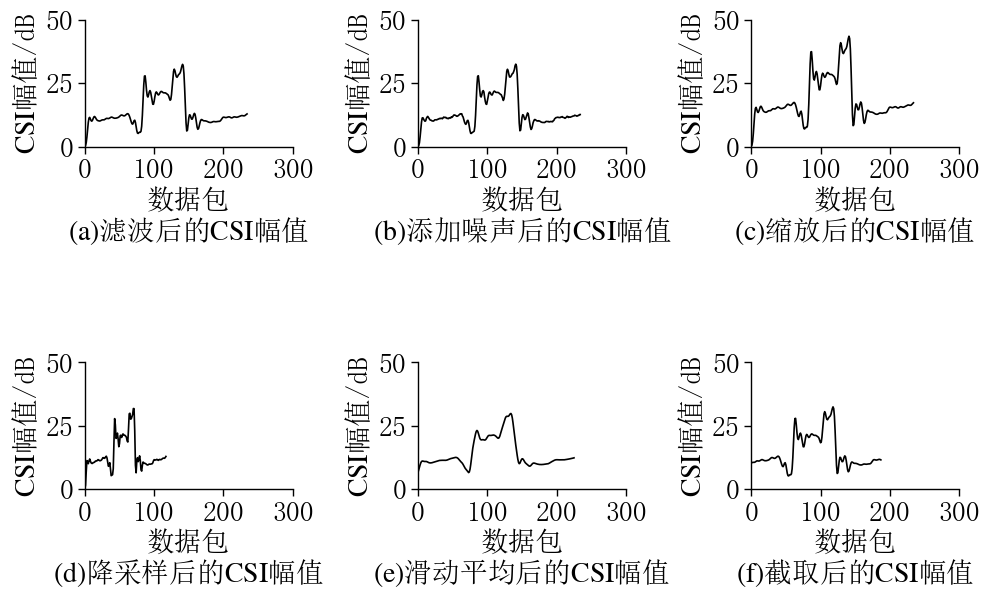

In [8]:
fig, ax = plt.subplots(2, 3, figsize=(10,7),dpi=100)  
data = c_filt[0][:, 1]
print(data.shape,32142142134)
ax[0,0].plot(data,color='k')
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['top'].set_visible(False)
ax[0,0].set_title('$\mathrm{(a)}$滤波后的$\mathrm{CSI}$幅值', fontsize=20, y=-0.8)
ax[0,0].set_xlabel('数据包', fontsize=20)
ax[0,0].set_ylabel('$\mathrm{CSI}$幅值/dB', fontsize=20)
# --抖动,添加噪声超参数：sigma =噪声的标准偏差（STD）
def DA_Jitter(X, sigma=0.1):  
    myNoise = np.random.normal(loc=0, scale=sigma, size=X.shape)
    # plt.plot(myNoise, label='noise')
    return X+myNoise
ax[0,1].plot(DA_Jitter(data),color='k')
ax[0,1].spines['right'].set_visible(False)
ax[0,1].spines['top'].set_visible(False)
ax[0,1].set_title('$\mathrm{(b)}$添加噪声后的$\mathrm{CSI}$幅值', fontsize=20, y=-0.8)
ax[0,1].set_xlabel('数据包', fontsize=20)
ax[0,1].set_ylabel('$\mathrm{CSI}$幅值/dB', fontsize=20)
# --缩放¶超参数:σ=放大/缩小系数的标准值通过乘以一个随机标量来更改窗口中数据的大小
def DA_Scaling(X, sigma=0.2):
    scalingFactor = np.random.normal(loc=1.0, scale=sigma, size=(1))
    myNoise = np.matmul(np.ones((X.shape[0],1)), scalingFactor)
    return X*myNoise
ax[0,2].plot(DA_Scaling(data),color='k')
ax[0,2].spines['right'].set_visible(False)
ax[0,2].spines['top'].set_visible(False)
ax[0,2].set_title('$\mathrm{(c)}$缩放后的$\mathrm{CSI}$幅值', fontsize=20,  y=-0.8)
ax[0,2].set_xlabel('数据包', fontsize=20)
ax[0,2].set_ylabel('$\mathrm{CSI}$幅值/dB', fontsize=20)
# 降采样,使用一组降采样因子 k1, k2, k3，每隔 ki-1 个数据取一个。
def down_sampling(data, rate=2):
    # down sampling by rate k
    if rate > data.shape[0] / 3:
        print('sampling rate is too high')
        return None
    ds_data = data[::rate]  # temp after down sampling
    ds_data_len = ds_data.shape[0]  # remark the length info
    return ds_data 
ax[1,0].plot(down_sampling(data),color='k')
ax[1,0].spines['right'].set_visible(False)
ax[1,0].spines['top'].set_visible(False)
ax[1,0].set_title('$\mathrm{(d)}$降采样后的$\mathrm{CSI}$幅值', fontsize=20, y=-0.8)
ax[1,0].set_xlabel('数据包', fontsize=20)
ax[1,0].set_ylabel('$\mathrm{CSI}$幅值/dB', fontsize=20)
# --滑动平均 使用一组滑动窗口l1, l2, l3，每li个数据取平均
def moving_average(data, moving_wl=10):
    data_len = data.shape[0]
    if  moving_wl > data.shape[0] / 3:
        print('moving window is too high')
        return None
    ma_data = np.zeros(data_len-moving_wl+1)
    for i in range(data_len-moving_wl+1):
        ma_data[i] = np.mean(data[i: i+moving_wl])
    return ma_data
ax[1,1].plot(moving_average(data),color='k')
ax[1,1].spines['right'].set_visible(False)
ax[1,1].spines['top'].set_visible(False)
ax[1,1].set_title('$\mathrm{(e)}$滑动平均后的$\mathrm{CSI}$幅值', fontsize=20,  y=-0.8)
ax[1,1].set_xlabel('数据包', fontsize=20)
ax[1,1].set_ylabel('$\mathrm{CSI}$幅值/dB', fontsize=20)
# ------------------裁剪（Crop） 使用滑动窗口在时间序列上截取数据
def data_crop(data, wl_ratio=0.8):
    data_len = data.shape[0]
    wl = int(data_len*wl_ratio)
    start = int(data_len*(1-wl_ratio)//2)
    end = start + wl
    #print(start, end)
    crop_data = data[start:end]
    return crop_data
ax[1,2].plot(data_crop(data),color='k')
ax[1,2].spines['right'].set_visible(False)
ax[1,2].spines['top'].set_visible(False)
ax[1,2].set_title('$\mathrm{(f)}$截取后的$\mathrm{CSI}$幅值', fontsize=20, y=-0.8)
ax[1,2].set_xlabel('数据包', fontsize=20)
ax[1,2].set_ylabel('$\mathrm{CSI}$幅值/dB', fontsize=20)
ax[0,0].set_xlim((0, 250))
ax[0,0].set_ylim((0, 50))
ax[0,1].set_xlim((0, 250))
ax[0,1].set_ylim((0, 50))
ax[0,2].set_xlim((0, 250))
ax[0,2].set_ylim((0, 50))
ax[1,0].set_xlim((0, 250))
ax[1,0].set_ylim((0, 50))
ax[1,1].set_xlim((0, 250))
ax[1,1].set_ylim((0, 50))
ax[1,2].set_xlim((0, 250))
ax[1,2].set_ylim((0, 50))
ax[0,0].set_xticks([0,100,200,])
ax[0,0].set_yticks([0,25,50])#
ax[0,1].set_xticks([0,100,200,300])
ax[0,1].set_yticks([0,25,50])#
ax[0,2].set_xticks([0,100,200,300])
ax[0,2].set_yticks([0,25,50])#
ax[1,0].set_xticks([0,100,200,300])
ax[1,0].set_yticks([0,25,50])#
ax[1,1].set_xticks([0,100,200,300])
ax[1,1].set_yticks([0,25,50])#
ax[1,2].set_xticks([0,100,200,300])
ax[1,2].set_yticks([0,25,50])#

plt.tight_layout()
plt.savefig('data_augment.svg', format='svg', bbox_inches='tight')  # 建议保存为svg格式,再用inkscape转为矢量图emf后插入word中
#plt.savefig('data_augment.png',dpi=300)

# SOM挑选子载波

50 328
-------这是第几个动作动作--------- 2 --------------------------------------------
0 (0, 0) 3 (49, 241) 0 0 0.071 0.142
0 (1, 0) 3 (1, 241) 1 0 0.071 0.46199999999999997
1 (1, 0) 3 (21, 241) 1 1 0.319 0.46199999999999997
1 (0, 0) 3 (21, 241) 0 1 0.319 0.142
1 (2, 0) 3 (8, 241) 2 1 0.319 0.782
2 (0, 0) 3 (50, 241) 0 2 0.567 0.142
3 (0, 0) 3 (38, 241) 0 3 0.815 0.142
3 (1, 0) 3 (12, 241) 1 3 0.815 0.46199999999999997


d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


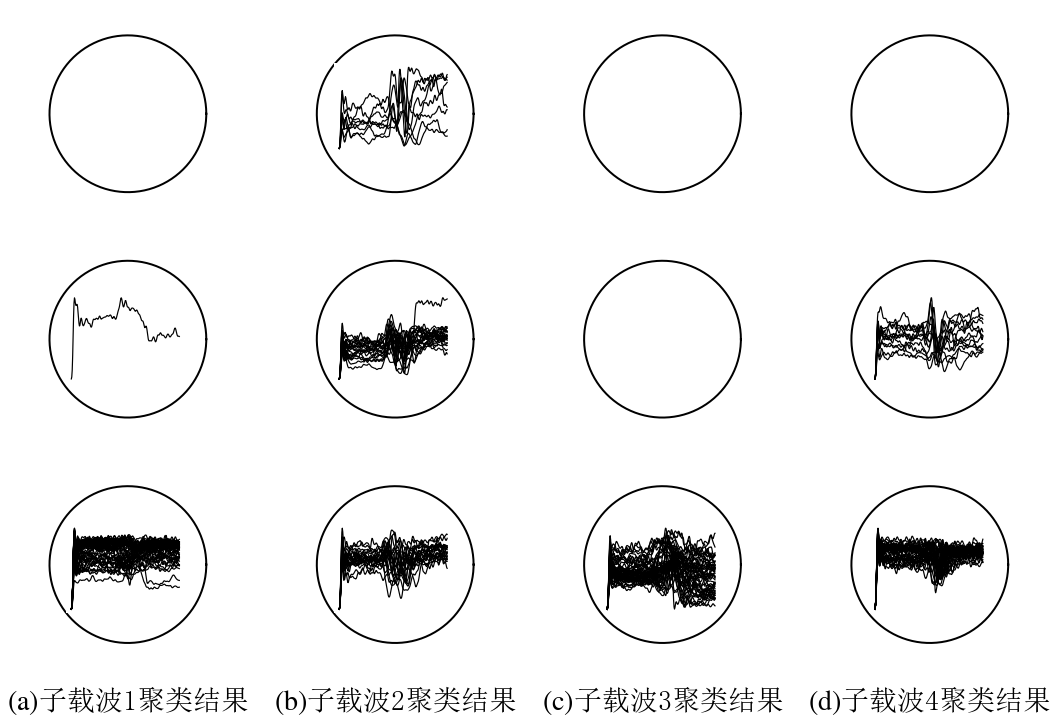

In [223]:
import sys
import math
from minisom import MiniSom
from matplotlib.gridspec import GridSpec

N = len(c_filt)  # 样本数量   
max_len = 0
for c in c_filt:   #  找到每个天线对最长的长度
    if c.shape[0] > max_len:
        max_len = c.shape[0]
print(N,max_len)

for index in range(2, 3):
    print('-------这是第几个动作动作---------', index,'--------------------------------------------')
    c_raw, c_filt = [], []   
    for i in os.listdir(path):
        results = re.match(re.compile(r'csi-s1-e1-a{}-.*?.dat'.format(index), re.S), i)  # 选择动作1可视化
        if results != None:
            name= results.group()
            # (n, 205, 3, 30)  # (n, 205, 3)
            raw, filt = process_data(os.path.join(path,i), os.path.join(train_save_path, '1'))  
            c_raw.append(raw)
            c_filt.append(filt)
    N = len(c_filt)  # 样本数量   
    max_len = 1000
    for c in c_filt:   #  找到每个天线对最长的长度
        if c.shape[0] < max_len:
            max_len = c.shape[0]
    M = max_len  # 维度/特征数量
    
    size = math.ceil(np.sqrt(5 * np.sqrt(N)))  # 经验公式：决定输出层尺寸
    size = 3 # 神经点个数
    fig, ax = plt.subplots(size, 4, figsize=(15, 10))
    for ant in range(4):
        X_train = np.zeros((N, max_len))
        for i in range(N):
            #X_train[i, :c_filt[i].shape[0]] = c_filt[i][:, ant]
            X_train[i, :] = c_filt[i][:max_len, ant]
        # 初始化权重以跨越前两个主分量。这种初始化不依赖于随机过程，使训练过程收敛得更快。
        #　强烈建议在初始化权重之前对数据进行规范化，并对训练数据使用相同的规范化。
        som = MiniSom(size, 1, M, sigma=1, learning_rate=0.5, neighborhood_function='bubble')
        som.pca_weights_init(X_train)
        som.train_batch(X_train, 5000)  
        # #  som.win_map 返回字典wm，其中wm[（i，j）]是一个列表，其中包含在位置i，j中映射的所有模式。
        # # (7, 3): [array([5. , 2. , 3.5, 1. ]), array([4.9, 2.4, 3.3, 1. ])
        win_map = som.win_map(X_train)
        for k in win_map.keys():
            #print(k, len(win_map[k]))
            d = np.array(win_map[k])
            
            left = 0.248*ant+0.071
            bottom = 0.32*k[0]+0.142
            print(ant, k, size, d.shape,k[0], ant, left,bottom)
            width, height =  0.11,0.124
            ax2 = fig.add_axes([left,bottom,width,height])
            ax2.plot(d.T,color='k')
            ax2.spines['right'].set_visible(False)
            ax2.spines['top'].set_visible(False)
            ax2.spines['bottom'].set_visible(False)
            ax2.spines['left'].set_visible(False)
            ax2.set_xticks([])
            ax2.set_yticks([])
    for i  in range(size): 
        for j in range(4):
#             ax[i,j].set_xlabel('数据包', fontsize=20)
#             ax[i,j].set_ylabel('$\mathrm{CSI}$幅值', fontsize=20)
            theta = np.linspace(0, 2 * np.pi, 200)
            x = np.cos(theta)
            y = np.sin(theta)
            ax[i,j].plot(x, y, color="k", linewidth=2)
            ax[i,j].spines['right'].set_visible(False)
            ax[i,j].spines['top'].set_visible(False)
            ax[i,j].spines['bottom'].set_visible(False)
            ax[i,j].spines['left'].set_visible(False)
            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])
            ax[i,j].axis("equal")
#             ax[i,j].set_xlim((0, 250))
#             ax[i,j].set_ylim((0, 50))

    ax[size-1,0].set_title('$\mathrm{(a)}$子载波1聚类结果', fontsize=28,  y=-0.2)
    ax[size-1,1].set_title('$\mathrm{(b)}$子载波2聚类结果', fontsize=28,  y=-0.2)
    ax[size-1,2].set_title('$\mathrm{(c)}$子载波3聚类结果', fontsize=28,  y=-0.2)
    ax[size-1,3].set_title('$\mathrm{(d)}$子载波4聚类结果', fontsize=28,  y=-0.2)

plt.tight_layout()
#plt.savefig('som.png', dpi=300)
plt.savefig('som.svg', format='svg')  # 建议保存为svg格式,再用inkscape转为矢量图emf后插入word中


# GASF转图像

(1, 64, 64)
(1, 64, 64)
(1, 64, 64)
(1, 64, 64)
(1, 64, 64)
(1, 64, 64)


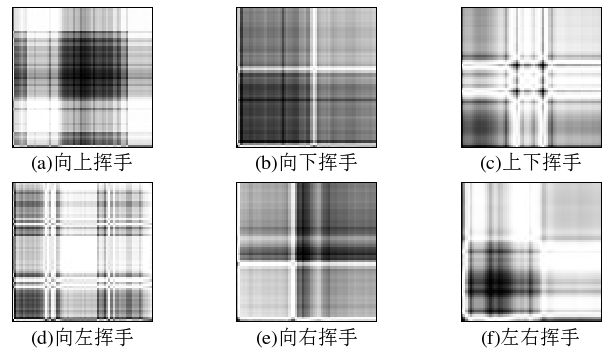

In [7]:
# activates = ['$\mathrm{(a)}$挥手','$\mathrm{(b)}$画圈']
# for i, data in enumerate([c_filt, c_filt2]):
#     X = data[0][:,0].reshape(1, -1)
#     image_size = 200
#     gasf = GASF(image_size)
#     X_gasf = gasf.fit_transform(X)
#     print(X_gasf.shape)
#     gadf = GADF(image_size)
#     X_gadf = gadf.fit_transform(X)
#     # print(X_gadf.shape)  (1, 200, 200)
#     ax[i].imshow(X_gasf[0], cmap='binary', origin='lower')
#     ax[i].set_title(activates[i], fontsize=20, y=-0.1)
#     ax[i].set_xticks([])
#     ax[i].set_yticks([])# ax.set_xticks([])ax.set_yticks([])
#     #plt.subplot(122)
#     #plt.imshow(X_gadf[0], cmap='rainbow', origin='lower')
#     #plt.title("GADF", fontsize=16)
# #plt.title("GASF 转图像效果", fontsize=16)
# ax[i].set_xticks([])
# ax[i].set_yticks([])# ax.set_xticks([])ax.set_yticks([])
# plt.tight_layout()
# plt.savefig('gasf.png',dpi=300)


fig, ax = plt.subplots(2, 3, figsize=(10, 5))  
antena = [1, 3, 3, 3, 2, 3]
activates = ['$\mathrm{(a)}$向上挥手','$\mathrm{(b)}$向下挥手','$\mathrm{(c)}$上下挥手',
             '$\mathrm{(d)}$向左挥手','$\mathrm{(e)}$向右挥手','$\mathrm{(f)}$左右挥手']
for index in range(6):
    c_raw, c_filt = [], []   
    for i in os.listdir(path):
        results = re.match(re.compile(r'csi-s1-e1-a{}-.*?.dat'.format(index+1), re.S), i)  # 选择动作1可视化
        if results != None:
            name= results.group()
            # (n, 205, 3, 30)  # (n, 205, 3)
            raw, filt = process_data(os.path.join(path,i), os.path.join(train_save_path, '1'))  
            c_raw.append(raw)
            c_filt.append(filt)
    X = c_filt[0][:, antena[index]].reshape(1, -1)
    image_size = 64
    gasf = GASF(image_size)
    X_gasf = gasf.fit_transform(X)
    print(X_gasf.shape)
    gadf = GADF(image_size)
    X_gadf = gadf.fit_transform(X)
    # print(X_gadf.shape)  (1, 200, 200)
    x, y = index//3, index%3
    ax[x, y].imshow(X_gasf[0], cmap='binary', origin='lower')
    ax[x, y].set_title(activates[index], fontsize=20, y=-0.2)
    ax[x, y].set_xticks([])
    ax[x, y].set_yticks([])# ax.set_xticks([])ax.set_yticks([])
    ax[x, y].set_xticks([])
    ax[x, y].set_yticks([])# ax.set_xticks([])ax.set_yticks([])
plt.tight_layout()
plt.savefig('gasf.svg', format='svg')  # 建议保存为svg格式,再用inkscape转为矢量图emf后插入word中

#plt.savefig('gasf.png',dpi=300)

In [ ]:
# activates = ['$\mathrm{(a)}$挥手','$\mathrm{(b)}$画圈']
# for i, data in enumerate([c_filt, c_filt2]):
#     X = data[0][:,0].reshape(1, -1)
#     image_size = 200
#     gasf = GASF(image_size)
#     X_gasf = gasf.fit_transform(X)
#     print(X_gasf.shape)
#     gadf = GADF(image_size)
#     X_gadf = gadf.fit_transform(X)
#     # print(X_gadf.shape)  (1, 200, 200)
#     ax[i].imshow(X_gasf[0], cmap='binary', origin='lower')
#     ax[i].set_title(activates[i], fontsize=20, y=-0.1)
#     ax[i].set_xticks([])
#     ax[i].set_yticks([])# ax.set_xticks([])ax.set_yticks([])
#     #plt.subplot(122)
#     #plt.imshow(X_gadf[0], cmap='rainbow', origin='lower')
#     #plt.title("GADF", fontsize=16)
# #plt.title("GASF 转图像效果", fontsize=16)
# ax[i].set_xticks([])
# ax[i].set_yticks([])# ax.set_xticks([])ax.set_yticks([])
# plt.tight_layout()
# plt.savefig('gasf.png',dpi=300)


fig, ax = plt.subplots(2, 3, figsize=(10, 5))  
antena = [1, 3, 3, 3, 2, 3]
activates = ['$\mathrm{(a)}$向上挥手','$\mathrm{(b)}$向下挥手','$\mathrm{(c)}$上下挥手',
             '$\mathrm{(d)}$向左挥手','$\mathrm{(e)}$向右挥手','$\mathrm{(f)}$左右挥手']
for index in range(6):
    c_raw, c_filt = [], []   
    for i in os.listdir(path):
        results = re.match(re.compile(r'csi-s1-e1-a{}-.*?.dat'.format(index+1), re.S), i)  # 选择动作1可视化
        if results != None:
            name= results.group()
            # (n, 205, 3, 30)  # (n, 205, 3)
            raw, filt = process_data(os.path.join(path,i), os.path.join(train_save_path, '1'))  
            c_raw.append(raw)
            c_filt.append(filt)
    X = c_filt[0][:, antena[index]].reshape(1, -1)
    image_size = 64
    gasf = GASF(image_size)
    X_gasf = gasf.fit_transform(X)
    print(X_gasf.shape)
    gadf = GADF(image_size)
    X_gadf = gadf.fit_transform(X)
    # print(X_gadf.shape)  (1, 200, 200)
    x, y = index//3, index%3
    ax[x, y].imshow(X_gasf[0], cmap='binary', origin='lower')
    ax[x, y].set_title(activates[index], fontsize=20, y=-0.2)
    ax[x, y].set_xticks([])
    ax[x, y].set_yticks([])# ax.set_xticks([])ax.set_yticks([])
    ax[x, y].set_xticks([])
    ax[x, y].set_yticks([])# ax.set_xticks([])ax.set_yticks([])
plt.tight_layout()
plt.savefig('gasf.svg', format='svg')  # 建议保存为svg格式,再用inkscape转为矢量图emf后插入word中

#plt.savefig('gasf.png',dpi=300)

(1, 64, 64)


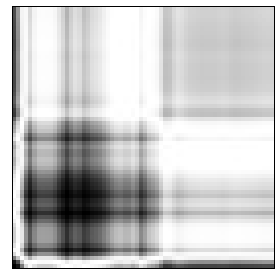

In [10]:
X = c_filt[0][:, 3].reshape(1, -1)
image_size = 64
gasf = GASF(image_size)
X_gasf = gasf.fit_transform(X)
print(X_gasf.shape)
gadf = GADF(image_size)
X_gadf = gadf.fit_transform(X)
# print(X_gadf.shape)  (1, 200, 200)
plt.imshow(X_gasf[0], cmap='binary', origin='lower')
plt.xticks([])
plt.yticks([])# ax.set_xticks([])ax.set_yticks([])
plt.tight_layout()
plt.savefig('gasf111.svg', format='svg')  # 建议保存为svg格式,再用inkscape转为矢量图emf后插入word中

(2250, 4000, 3)


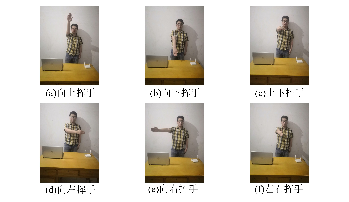

In [2]:
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np

lena = mpimg.imread(r'C:\Users\tomding\SR_CSI\paper\4.jpg') # 读取和代码处于同一目录下的 lena.png
# 此时 lena 就已经是一个 np.array 了，可以对它进行任意处理
print(lena.shape) #(512, 512, 3)
plt.imshow(lena) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

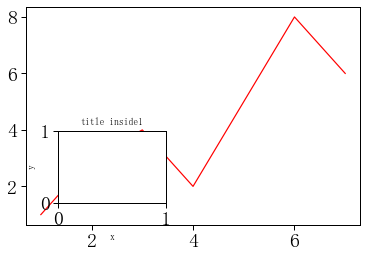

(-1.0978426623878532,
 1.0998972696375169,
 -1.0994348378207568,
 1.0994348378207568)

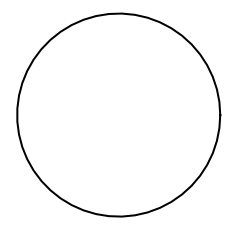

In [91]:
学生党小白一枚，自己琢磨了一套配置，各位大佬看看有问题没
CPU：3600散片                        1085
显卡：技嘉RTC2060 OC 6G              2089
主板：华硕 STRIX B450-I GAMING       883
内存：海盗船复仇者3000 8G            224
硬盘：西数SN500 蓝盘 500G            453
机箱、电源：酷鱼G5 Plus + 全汉MS450W 719
散热器：利民AXP90纯铜                  233
共计：5686





In [ ]:
# 生成batch_size的信号时频图和标签数据，存放到两个list中去
def get_train_data(w_list, l_list, p_list, image_size):
    for index in range(len(w_list)):
        fbank = compute_fbank_filt(w_list[index], image_size)
        # !!!!!!!3个maxpooling层数据的每个维度需要能够被8整除。因此我们训练实际输入的数据为wav_len//8。!!!!!!!!!!!!             
        pad_fbank = np.zeros((image_size//8*8+8,image_size))#fbank.shape[0]//8*8+8, fbank.shape[1], 3))
        pad_fbank[:fbank.shape[0], :] = fbank
        label = py2id(l_list[index], p_list)
        wav_batch.append(pad_fbank)
        label_batch.append(label)
    pad_wav_data, wav_length = wav_padding(image_size, wav_batch)
    pad_label_data, label_length = label_padding(label_batch)
    inputs = {'the_inputs': pad_wav_data,
                   'the_labels': pad_label_data,
                   'input_length': wav_length,
                   'label_length': label_length}
    outputs = {'ctc': np.zeros(pad_wav_data.shape[0])}

    return inputs, outputs

 # 生成的信号时频图和标签数据，存放到两个list中去
def get_data(image_size, w_list, l_list, p_list):
    input_data = []
    output_data = []
    for i in range(len(w_list)):
        wav_batch = []
        label_batch = []
        fbank = compute_fbank_filt(w_list[i], image_size)
        # !!!!!!!3个maxpooling层数据的每个维度需要能够被8整除。因此我们训练实际输入的数据为wav_len//8。!!!!!!!!!!!!
        pad_fbank = np.zeros((image_size//8*8+8,image_size))#fbank.shape[0]//8*8+8, fbank.shape[1], 1))
        pad_fbank[:fbank.shape[0], :] = fbank
        label = py2id(l_list[i], p_list)
        wav_batch.append(pad_fbank)
        label_batch.append(label)
        pad_wav_data, wav_length = wav_padding(image_size, wav_batch)
        input_data.append(pad_wav_data)                                        
        output_data.append(label[0])
    return input_data, output_data